In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import pandas as pd

import numpy as np

In [2]:
cal_house = california_housing.fetch_california_housing()

In [8]:
house_data = pd.DataFrame(cal_house.data,columns=cal_house.feature_names)
house_data['price'] = cal_house.target
house_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [27]:
np.exp(4.526)

92.38826791783592

In [9]:
# remove the 'price column from the dataframe again'
house_data = pd.DataFrame(cal_house.data,columns=cal_house.feature_names)

In [10]:
trainX, testX, trainY, testY = train_test_split(house_data,cal_house.target,random_state=123)

In [11]:
trainX.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
19995,1.0349,6.0,4.165217,0.982609,734.0,3.191304,36.19,-119.35
17889,4.7625,13.0,5.265207,1.002433,1087.0,2.644769,37.41,-121.95
1977,3.5192,9.0,8.747475,1.845118,796.0,2.680135,38.61,-120.44
6861,2.8672,30.0,4.635616,1.090411,1130.0,3.095890,34.06,-118.13
11247,4.1276,13.0,4.429936,0.963376,1749.0,2.785032,33.81,-118.00


In [12]:
trainY

array([0.678, 1.375, 0.98 , ..., 2.862, 4.125, 0.593])

In [13]:
trainX.shape

(15480, 8)

In [14]:
testX.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
19121,3.7917,40.0,4.959799,1.030151,1039.0,2.610553,38.24,-122.64
20019,4.0217,9.0,5.804577,1.000000,1749.0,3.079225,36.09,-119.05
15104,4.0882,12.0,5.360360,1.070571,3321.0,4.986486,32.85,-116.98
3720,2.2377,27.0,3.376582,1.023207,3403.0,3.589662,34.20,-118.42
8938,4.4211,41.0,5.656904,1.165272,1047.0,2.190377,34.01,-118.47


In [15]:
testY

array([1.516, 0.992, 1.345, ..., 1.096, 0.379, 1.554])

In [16]:
testX.shape

(5160, 8)

In [17]:
trainY

array([0.678, 1.375, 0.98 , ..., 2.862, 4.125, 0.593])

In [18]:
lr = LinearRegression(fit_intercept=True)
lr.fit(trainX,trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
lr.coef_

array([ 4.39578737e-01,  9.38637568e-03, -1.09576846e-01,  6.35540309e-01,
       -2.82428538e-06, -3.84741305e-03, -4.18880581e-01, -4.31643546e-01])

In [23]:
pd.DataFrame({'features':trainX.columns,'weights':lr.coef_})

,features,weights
0,MedInc,0.439579
1,HouseAge,0.009386
2,AveRooms,-0.109577
3,AveBedrms,0.635540
4,Population,-0.000003
5,AveOccup,-0.003847
6,Latitude,-0.418881
7,Longitude,-0.431644


In [24]:
lr.intercept_

-36.671773545385896

In [16]:
pred = lr.predict(testX)

In [17]:
pd.DataFrame({'target':testY,'pred':pred})


,pred,target
0,2.387448,1.51600
1,1.433028,0.99200
2,2.035838,1.34500
3,1.611689,2.31700
4,2.656499,4.62900
5,2.143559,1.40700
6,1.482189,1.70300
7,2.071257,1.60300
8,2.047624,1.01800
9,1.627828,1.68800


In [53]:
# MSE
np.mean((testY - pred)**2)

0.51629877340428987

In [58]:
cal_house.target

array([ 4.526,  3.585,  3.521, ...,  0.923,  0.847,  0.894])

In [59]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, 'r--',)

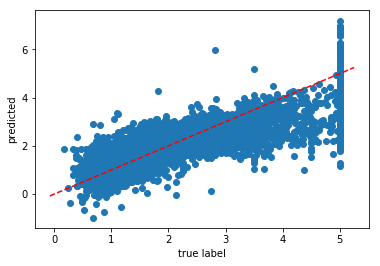

In [60]:
import matplotlib.pyplot as plt
import pylab

plt.scatter(testY,pred)
abline(1,0)
plt.xlabel('true label')
plt.ylabel('predicted')
plt.show()

# Background

In [61]:
X = np.array(trainX)
X.shape

(15480, 8)

In [62]:
# add dummy 1-column
X = np.hstack([np.ones([X.shape[0],1]),X])
X.shape

(15480, 9)

In [63]:
y = np.array(trainY)
y.shape

(15480,)

In [64]:
# select model parameters (learn): by direct optimization
w_ML = np.linalg.inv(X.T @ X) @ X.T @ y
w_ML

array([ -3.66717735e+01,   4.39578737e-01,   9.38637568e-03,
        -1.09576846e-01,   6.35540309e-01,  -2.82428538e-06,
        -3.84741305e-03,  -4.18880581e-01,  -4.31643546e-01])

In [65]:
[lr.intercept_,lr.coef_]

[-36.671773545385918,
 array([  4.39578737e-01,   9.38637568e-03,  -1.09576846e-01,
          6.35540309e-01,  -2.82428538e-06,  -3.84741305e-03,
         -4.18880581e-01,  -4.31643546e-01])]

In [66]:
# predict new data
X_test = np.array(testX)
X_test = np.hstack([np.ones([X_test.shape[0],1]),X_test])
y_pred = X_test @ w_ML

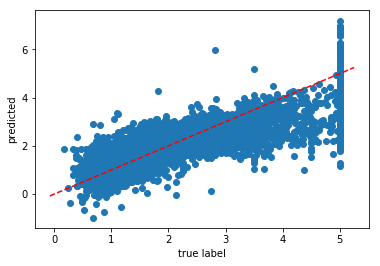

In [67]:
plt.scatter(testY,y_pred)
abline(1,0)
plt.xlabel('true label')
plt.ylabel('predicted')
plt.show()

In [68]:
# select model parameters (learn): by  gradient descent

In [106]:
# standardizing data
X = np.array(trainX)
X_test = np.array(testX)
mm = np.mean(X,axis=0)
ss = np.std(X,axis=0)
X = (X - mm)/ss
X_test = (X_test - mm) /ss

X = np.hstack([np.ones([X.shape[0],1]),X])
X_test = np.hstack([np.ones([X_test.shape[0],1]),X_test])

In [107]:
# select model parameters (learn): by gradient descent

np.random.seed(12345)
# initialize
w_est = np.random.normal(0, np.sqrt(1/X.shape[0]), 9)

# calculate gradient
for i in range(10000):
    idx = np.random.choice(X.shape[0],512)
    gradW = -(y[idx] - X [idx,:] @ w_est) @ X[idx,:] * (1/len(idx))
    w_est = w_est - 0.01*gradW

In [108]:
y_pred = X_test @ w_est
y_pred

array([ 2.38218351,  1.43842134,  2.03207124, ...,  1.57903182,
        1.60128534,  0.81733253])

In [109]:
testY

array([ 1.516,  0.992,  1.345, ...,  1.096,  0.379,  1.554])

In [110]:
np.mean((testY - y_pred)**2)

0.51622349371059817

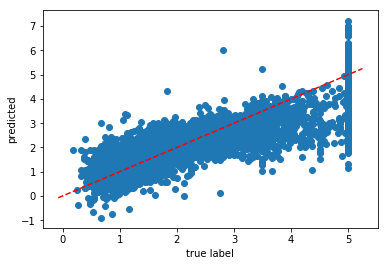

In [111]:
plt.scatter(testY,y_pred)
abline(1,0)
plt.xlabel('true label')
plt.ylabel('predicted')
plt.show()